---
# Exercício - Regressão Logística (iris dataset)
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**

# Introdução

Objetivo do caderno:  
Fonte de dados:  
Autor:  
Data:  



# Carregar bibliotecas de código

In [1]:
# Entre código aqui...
# Carregar bibliotecas (pandas etc)
import pandas as pd
from sklearn.datasets import load_iris

# Carregar Regressão Logística 
from sklearn.linear_model import LogisticRegression

# Carregar dados
ds_iris = load_iris()

# Análise exploratória do dados

In [2]:
# Entre código aqui...
# Ler dados
ds_iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [3]:
# Analisar dimensões do dataset
X = pd.DataFrame(ds_iris.data, columns=ds_iris.feature_names)
y = ds_iris.target
X.shape

(150, 4)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# mostrar as primeiras linhas do dataset
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Preparação dos dados

In [7]:
# Dividir o dataset entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Treinar o modelo

In [8]:
# instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=1000) 

# treinar modelo
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Testar o modelo (inferência)

In [9]:
# fazer predição da espécie para uma nova flor com as dimensões: [5.1, 3.5, 1.4, 0.2]
pred_result = reg_log.predict([[5.1, 3.5, 1.4, 0.2]])

In [10]:
# mostrar resultado da predição
ds_iris.target_names[pred_result][0]

'setosa'

## Avaliar o modelo

In [11]:
# mostrar score
reg_log.score(X_test, y_test)

0.9666666666666667

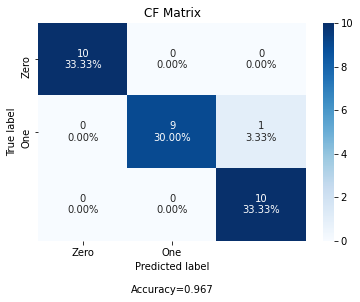

In [13]:
# mostrar matrix de confusão
import cf_matrix as cm
cm.getConfusionMatrixHeatMap(reg_log, X_test, y_test);